In [ ]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

In [ ]:
# Importing dataset
df=pd.read_excel("/content/Airlines+Data.xlsx",index_col=0,parse_dates=True)

# Here month column is date type. We have made Month column as index column
# and parse_dates=True tells python that Month is a date type column otherwise it will consider it as normal index.

df

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


**EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [ ]:
# Checking the null entries if any
df.isnull().sum()

Passengers    0
dtype: int64

In [ ]:
# Droping the duplicates if any

df.drop_duplicates(inplace=True)
df

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-07-01,413
2002-08-01,405
2002-09-01,355


In [ ]:
df.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-09-01',
               '1995-10-01', '1995-11-01', '1996-01-01', '1996-02-01',
               '1996-03-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-07-01', '1997-09-01', '1997-10-01',
               '1997-11-01', '1997-12-01', '1998-01-01', '1998-02-01',
               '1998-03-01', '1998-04-01', '1998-05-01', '1998-06-01',
               '1998-07-01', '1998-08-01', '1998-09-01', '1998-10-01',
               '1998-12-01', '1999-01-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
               '1999-09-01', '1999-10-01', '1999-12-01', '2000-01-01',
               '2000-02-01', '2000-04-01', '2000-05-01', '2000-07-01',
      

**visualising the data set**

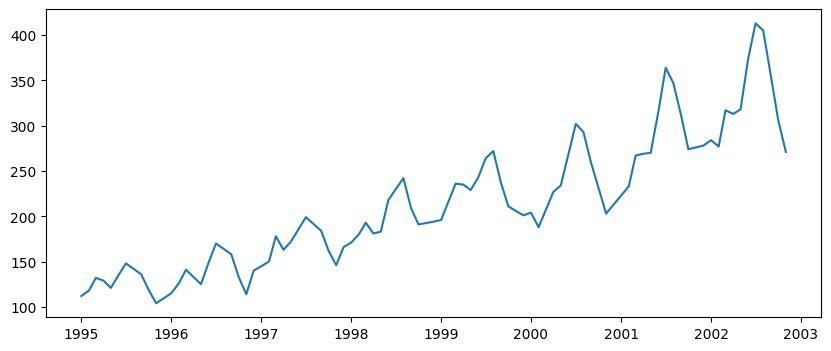

In [ ]:
# Trend=Linear upward, Seasonality = Multiplicative

plt.figure(figsize=(10,4))
plt.plot(df)
plt.show()

**Above plot shows the gradual increase and sudden dip of passenger from 1995 to 2003**

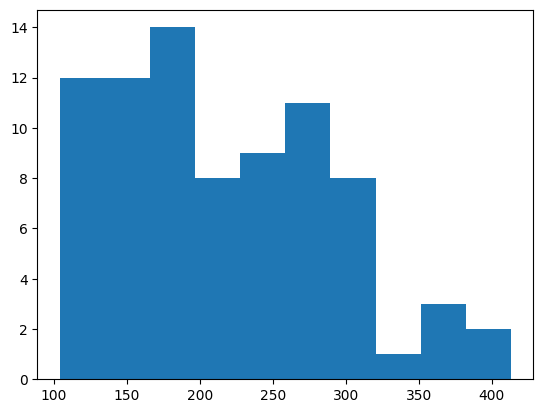

In [ ]:
plt.hist(df)
plt.show()

**Coverting the  non-stationary data to stationary.**

In [ ]:
# Adding the pass_diff column to the data.
#Stationary dataset: Mean, variance, std deviation is remaining constant throughout the years.

df["pass_diff"]=df["Passengers"].diff(periods=1)
df

,Passengers,pass_diff
Month,,
1995-01-01,112,NaN
1995-02-01,118,6.0
1995-03-01,132,14.0
1995-04-01,129,-3.0
1995-05-01,121,-8.0
...,...,...
2002-07-01,413,39.0
2002-08-01,405,-8.0
2002-09-01,355,-50.0


In [ ]:
# Dropping the NA values from df
df.dropna(inplace=True)
df

,Passengers,pass_diff
Month,,
1995-02-01,118,6.0
1995-03-01,132,14.0
1995-04-01,129,-3.0
1995-05-01,121,-8.0
1995-06-01,135,14.0
...,...,...
2002-07-01,413,39.0
2002-08-01,405,-8.0
2002-09-01,355,-50.0


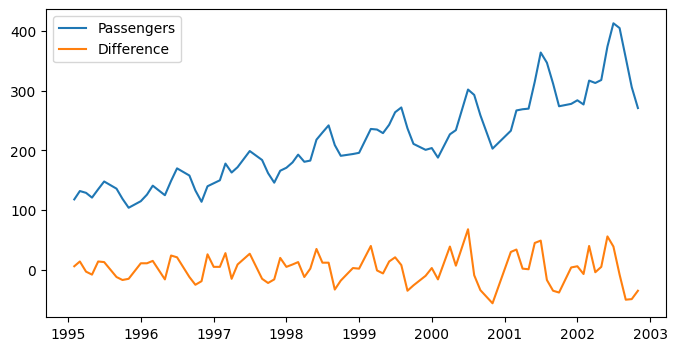

In [ ]:
# Plotting the statioanry data, Difference of the data.

plt.figure(figsize=(8,4))
plt.plot(df["Passengers"],label="Passengers")
plt.plot(df["pass_diff"],label="Difference")
plt.legend()
plt.show()

In [ ]:
# Calculating AutoCorelation Function

acf_values=acf(df["pass_diff"])
np.round(acf_values,2)

array([ 1.  ,  0.26, -0.18, -0.31, -0.11, -0.09, -0.2 , -0.17,  0.01,
        0.18,  0.3 ,  0.17, -0.03, -0.05, -0.13, -0.14, -0.14, -0.09,
        0.07])

**Plotting Autocorrelation**

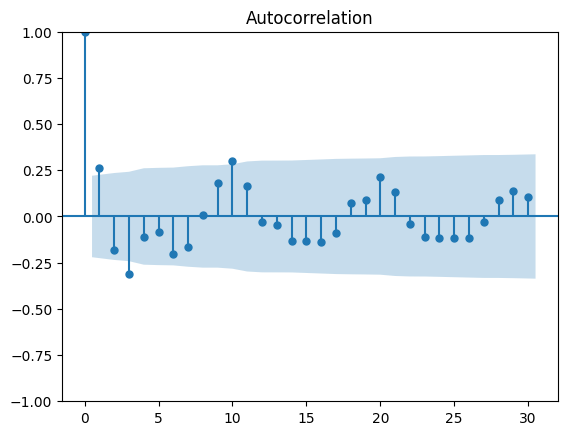

In [ ]:
plot_acf(df["pass_diff"],lags=30); # lags=30, it means it will plot 30 values

<Figure size 3200x2000 with 0 Axes>

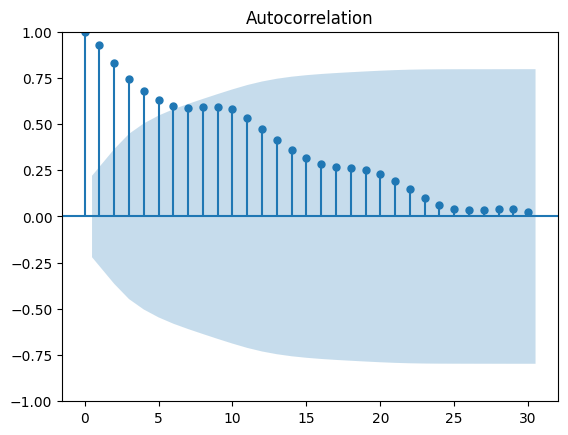

In [ ]:
plt.figure(figsize=(32,20))
plot_acf(df["Passengers"],lags=30);

**Partial Autocorrelation Function**




<Figure size 1300x400 with 0 Axes>

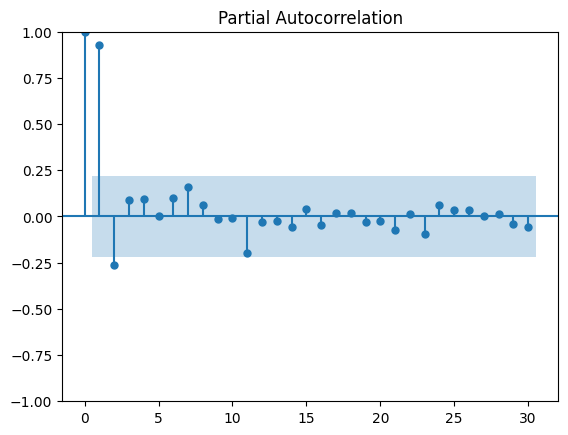

In [ ]:
plt.figure(figsize=(13,4))
plot_pacf(df["Passengers"],lags=30);

In [ ]:
# Importing the data

air=pd.read_excel("/content/Airlines+Data.xlsx")
air

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [ ]:
# Extracting thr month and year from the data

air["month"]=air.Month.dt.strftime("%b")# extracting month
air["year"]=air.Month.dt.strftime("%Y") # extracting Year, note that if we use %y-it will give on 96 unlike %Y will give 1996
air

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [ ]:
# Creating the columns of t, tsqr,tlog

air["t"]=np.arange(1,97)
air["t_sqr"]=np.square(air.t)
air["t_log"]=np.log(air.Passengers)

In [ ]:
# Pulling out each month
air1=pd.get_dummies(air["month"])
air1

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Concating the air and air1 data

airline=pd.concat([air,air1],axis=1)
airline

,Month,Passengers,month,year,t,t_sqr,t_log,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,2002,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,2002,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,Nov,2002,95,9025,5.602119,0,0,0,0,0,0,0,0,0,1,0,0


**Spliting the data into Train and Test**

In [ ]:
train=airline.head(84)
test=airline.tail(12)

In [ ]:
train

,Month,Passengers,month,year,t,t_sqr,t_log,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2001-08-01,347,Aug,2001,80,6400,5.849325,0,1,0,0,0,0,0,0,0,0,0,0
80,2001-09-01,312,Sep,2001,81,6561,5.743003,0,0,0,0,0,0,0,0,0,0,0,1
81,2001-10-01,274,Oct,2001,82,6724,5.613128,0,0,0,0,0,0,0,0,0,0,1,0
82,2001-11-01,237,Nov,2001,83,6889,5.468060,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

**Note- Which ever model will give less rmse(root mean squared error) it will be condidered as a best model**

**linear Model**

In [ ]:
li_model=smf.ols("Passengers~t",data=train).fit() # Passenger=y variable (denpendent), t= X-variable (independent).
li_pred=pd.Series(li_model.predict(pd.DataFrame(test["t"])))  # get prediction for test data
Linear_rmse=np.sqrt(mean_squared_error(test["Passengers"],li_pred)) # There is no direct built-in function for rmse so take sqrt of MSE
Linear_rmse #rmse(root mean squared error)

53.19923653480278


**Exponential model**

In [ ]:
# For exponential model we will take Y variable as log of Y

exp_model=smf.ols("t_log~t",data=train).fit()
pred_exp=pd.Series(exp_model.predict(pd.DataFrame(test["t"])))
exp_rmse=np.sqrt(mean_squared_error(test["Passengers"],pred_exp))
exp_rmse

325.71506135515364

**Quadratic Model**

In [ ]:
# In quadratic model building we will use X variable as t and square of t

model_qua=smf.ols("Passengers~t+t_sqr",data=train).fit() # Traing the data.
qua_pred=pd.Series(model_qua.predict(pd.DataFrame(test[["t","t_sqr"]]))) #
qua_rmse=np.sqrt(mean_squared_error(test["Passengers"],qua_pred))
qua_rmse

48.05188897933164

**Additive Seasonality Model**

In [ ]:
# In Additive seasonality we will pass the x variable from Jan to nov

model_add=smf.ols("Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov",data=train).fit()
pred_add=pd.Series(model_add.predict(pd.DataFrame(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct',"Nov"]])))
rmse_add=np.sqrt(mean_squared_error(test["Passengers"],pred_add))
rmse_add

132.8197848142182

**Additive Seasonality Quadratic**

In [ ]:
# In Additive Seasonality Quadratic we will combine the x varibales of both quadratic and additives

add_sea_qua=smf.ols("Passengers~t+t_sqr+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov",data=train).fit()
pred_add_sea=pd.Series(add_sea_qua.predict(pd.DataFrame(test[["t","t_sqr",'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct',"Nov"]])))
rmse_add_sea=np.sqrt(mean_squared_error(test["Passengers"],pred_add_sea))
rmse_add_sea

26.360817612095307

**Multiplicative Seasonality**

In [ ]:
# In multilicative seasonality we will take y variable as log_t

mul_sea=smf.ols("t_log~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov",data=train).fit()
pred_mul=pd.Series(mul_sea.predict(pd.DataFrame(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct',"Nov"]])))
rmse_mul_sea=np.sqrt(mean_squared_error(test["Passengers"],pred_mul))
rmse_mul_sea

326.2267987143024

In [105]:
# Adding the all the result is a single dataFrame

data={"Model":pd.Series(["Linear","Exponential","Quadratic","Additive Seasonality","Additive Seasonality Quadratic","Multiplicative Seasonality"]),
                         "RMSE_values":pd.Series([Linear_rmse,exp_rmse,qua_rmse,rmse_add,rmse_add_sea,rmse_mul_sea])}
df=pd.DataFrame(data)
df.sort_values(["RMSE_values"])


,Model,RMSE_values
4,Additive Seasonality Quadratic,26.360818
2,Quadratic,48.051889
0,Linear,53.199237
3,Additive Seasonality,132.819785
1,Exponential,325.715061
5,Multiplicative Seasonality,326.226799


**As a result of the above table we can conclude that the Additive Seasonality quadratic give us a leeser rsme value which is the best model we can consider**